<a href="https://colab.research.google.com/github/qweliant/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def sqrt(val):
  return (val ** (1/2))
  pass

def variance(set, ddof=0):
  sum = 0
  for x in set:
    sum = sum + x
  
  mean = sum/(len(set))

  var = [x - mean for x in set]
  var_set = [x ** 2 for x in var]
  
  vari = 0;
  for x in var_set:
    vari = vari + x
    
  varys_by = vari /len(var_set)
  stddev = sqrt(varys_by) 

  return varys_by, mean, stddev
  pass


In [2]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
vari_sales, mean_sales, stddev_sales = variance(sales, 1)

print(f'Mean: {mean_sales}')
print(f'Variance: {vari_sales}')
print(f'Standard Deviation: {stddev_sales}')

Mean: 3052.714285714286
Variance: 183761.06122448976
Standard Deviation: 428.67360686714756


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(np.mean([3505, 2400, 3027, 2798, 3700, 3250, 2689]))
print(np.var([3505, 2400, 3027, 2798, 3700, 3250, 2689]))
print(np.std([3505, 2400, 3027, 2798, 3700, 3250, 2689]))

3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
def covariance(one, two):
    if len(one) != len(two):
        return "Check array length"
    mu_one = variance(one)[1]
    mu_two = variance(two)[1]

    one_sub_mu = [ x - mu_one for x in one ]
    print(one_sub_mu) 

    two_sub_mu = [ x - mu_two for x in two ]
    print(two_sub_mu)

    multiply_it = [a*b for a,b in zip(one_sub_mu, two_sub_mu)]
    print(multiply_it)

    cov_1 = sum(multiply_it)
    print(cov_1)
    cov = cov_1 / (len(one)-1)
    return cov
    pass


In [5]:
customers = [127, 80, 105, 92, 120, 115, 93]
cov = covariance(customers, sales)



[22.42857142857143, -24.57142857142857, 0.4285714285714306, -12.57142857142857, 15.42857142857143, 10.42857142857143, -11.57142857142857]
[452.2857142857142, -652.7142857142858, -25.71428571428578, -254.71428571428578, 647.2857142857142, 197.28571428571422, -363.7142857142858]
[10144.122448979591, 16038.122448979591, -11.020408163265387, 3202.1224489795923, 9986.69387755102, 2057.408163265306, 4208.693877551021]
45626.142857142855


In [6]:
print(np.cov(customers, y=sales, bias=False))

[[   290.95238095   7604.35714286]
 [  7604.35714286 214387.9047619 ]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient, r, that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [7]:
stddev_cust = variance(customers)[2]
correlation_coefficient = cov/(stddev_cust * stddev_sales)
print(correlation_coefficient)

std_1 = np.std(customers, ddof=1)
std_2 = np.std(sales, ddof=1)
correlation_coefficient = cov/(std_1 * std_2)
print(correlation_coefficient)

1.123306307450706
0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [8]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"
titanic = pd.read_csv(url)
titanic.fillna(method='ffill')

titanic.head()


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [9]:
titanic.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
titanic.sex.unique()

array(['female', 'male', nan], dtype=object)

In [11]:
uni = list(titanic.cabin.unique())
uni

['B5',
 'C22 C26',
 'E12',
 'D7',
 'A36',
 'C101',
 nan,
 'C62 C64',
 'B35',
 'A23',
 'B58 B60',
 'D15',
 'C6',
 'D35',
 'C148',
 'C97',
 'B49',
 'C99',
 'C52',
 'T',
 'A31',
 'C7',
 'C103',
 'D22',
 'E33',
 'A21',
 'B10',
 'B4',
 'E40',
 'B38',
 'E24',
 'B51 B53 B55',
 'B96 B98',
 'C46',
 'E31',
 'E8',
 'B61',
 'B77',
 'A9',
 'C89',
 'A14',
 'E58',
 'E49',
 'E52',
 'E45',
 'B22',
 'B26',
 'C85',
 'E17',
 'B71',
 'B20',
 'A34',
 'C86',
 'A16',
 'A20',
 'A18',
 'C54',
 'C45',
 'D20',
 'A29',
 'C95',
 'E25',
 'C111',
 'C23 C25 C27',
 'E36',
 'D34',
 'D40',
 'B39',
 'B41',
 'B102',
 'C123',
 'E63',
 'C130',
 'B86',
 'C92',
 'A5',
 'C51',
 'B42',
 'C91',
 'C125',
 'D10 D12',
 'B82 B84',
 'E50',
 'D33',
 'C83',
 'B94',
 'D49',
 'D45',
 'B69',
 'B11',
 'E46',
 'C39',
 'B18',
 'D11',
 'C93',
 'B28',
 'C49',
 'B52 B54 B56',
 'E60',
 'C132',
 'B37',
 'D21',
 'D19',
 'C124',
 'D17',
 'B101',
 'D28',
 'D6',
 'D9',
 'B80',
 'C106',
 'B79',
 'C47',
 'D30',
 'C90',
 'E38',
 'C78',
 'C30',
 'C118',
 

In [0]:

nums=[]
for i,x in enumerate(uni):
    nums.append(i)
    #print(i,x)

zipper= dict(zip(uni, nums))

In [0]:
new_values1 = { 
    "S" : 0,
    "C" : 1,
    "Q" : 2,
    "male" : 0,
    "female" : 1,
    }


In [0]:
# encode = new_values1.update(zipper)

In [15]:
titanic.replace(new_values1, inplace=True)
titanic.replace(zipper, inplace=True)
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",1.0,29.0000,0.0,0.0,24160,211.3375,0,0,2,6.0,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",0.0,0.9167,1.0,2.0,113781,151.5500,1,0,11,6.0,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",1.0,2.0000,1.0,2.0,113781,151.5500,1,0,6,6.0,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0.0,30.0000,1.0,2.0,113781,151.5500,1,0,6,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1.0,25.0000,1.0,2.0,113781,151.5500,1,0,6,6.0,"Montreal, PQ / Chesterville, ON",1


In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_titanic = titanic.select_dtypes(include=numerics)

In [17]:
new_titanic.head()

,Unnamed: 0,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,body,has_cabin_number
0,1,1.0,1.0,1.0,29.0000,0.0,0.0,211.3375,0,0,6.0,1
1,2,1.0,1.0,0.0,0.9167,1.0,2.0,151.5500,1,0,6.0,1
2,3,1.0,0.0,1.0,2.0000,1.0,2.0,151.5500,1,0,6.0,1
3,4,1.0,0.0,0.0,30.0000,1.0,2.0,151.5500,1,0,135.0,1
4,5,1.0,0.0,1.0,25.0000,1.0,2.0,151.5500,1,0,6.0,1


In [18]:
new_titanic.cov()

,Unnamed: 0,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,body,has_cabin_number
Unnamed: 0,143117.500000,285.992361,-51.116883,-19.721925,-1442.939812,28.559587,3.979374,-9421.900510,-6221.095875,13.395722,-588.483575,-95.438885
pclass,285.992361,0.711912,-0.111261,-0.034010,-3.951584,0.068609,0.029158,-24.282616,-18.594528,0.020154,-2.158672,-0.250439
survived,-51.116883,-0.111261,0.260162,0.147201,-0.314103,0.009515,0.058829,6.027628,4.763010,0.029557,-5.527436,0.060392
sex,-19.721925,-0.034010,0.147201,0.253580,-0.353932,0.078349,0.112486,4.483206,1.962540,0.035968,-4.174362,0.026516
age,-1442.939812,-3.951584,-0.314103,-0.353932,165.850021,-2.557851,-1.458263,113.603328,100.551693,0.301377,98.341952,1.463138
sibsp,28.559587,0.068609,0.009515,0.078349,-2.557851,1.107325,0.360155,8.524431,-0.953439,-0.051624,-3.029944,-0.004890
parch,3.979374,0.029158,0.058829,0.112486,-1.458263,0.360155,0.772689,9.803985,1.062818,-0.055680,-1.161658,0.012340
fare,-9421.900510,-24.282616,6.027628,4.483206,113.603328,8.524431,9.803985,2676.003200,745.242283,2.081318,-38.822828,10.969581
cabin,-6221.095875,-18.594528,4.763010,1.962540,100.551693,-0.953439,1.062818,745.242283,2073.645916,1.007565,104.368975,15.421011
embarked,13.395722,0.020154,0.029557,0.035968,0.301377,-0.051624,-0.055680,2.081318,1.007565,0.426853,-0.848286,0.009016


In [19]:
new_titanic.corr()

,Unnamed: 0,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,body,has_cabin_number
Unnamed: 0,1.000000,0.895973,-0.264908,-0.103525,-0.296172,0.071741,0.011966,-0.481447,-0.361121,0.054198,-0.028957,-0.603727
pclass,0.895973,1.000000,-0.258529,-0.080045,-0.363664,0.077273,0.039314,-0.556338,-0.483955,0.036560,-0.047626,-0.710313
survived,-0.264908,-0.258529,1.000000,0.573099,-0.047818,0.017727,0.131211,0.228445,0.205065,0.088695,-0.201732,0.283348
sex,-0.103525,-0.080045,0.573099,1.000000,-0.054576,0.147856,0.254120,0.172103,0.085584,0.109326,-0.154314,0.126014
age,-0.296172,-0.363664,-0.047818,-0.054576,1.000000,-0.188747,-0.128818,0.170526,0.171461,0.035819,0.142152,0.271887
sibsp,0.071741,0.077273,0.017727,0.147856,-0.188747,1.000000,0.389358,0.156597,-0.019897,-0.075088,-0.053601,-0.011120
parch,0.011966,0.039314,0.131211,0.254120,-0.128818,0.389358,1.000000,0.215604,0.026552,-0.096953,-0.024601,0.033594
fare,-0.481447,-0.556338,0.228445,0.172103,0.170526,0.156597,0.215604,1.000000,0.316364,0.061582,-0.013971,0.507467
cabin,-0.361121,-0.483955,0.205065,0.085584,0.171461,-0.019897,0.026552,0.316364,1.000000,0.033866,0.042666,0.810414
embarked,0.054198,0.036560,0.088695,0.109326,0.035819,-0.075088,-0.096953,0.061582,0.033866,1.000000,-0.024170,0.033023


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

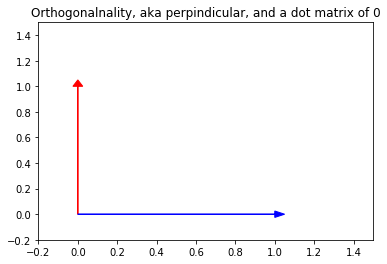

In [20]:
v1 = [0,1]
v2 = [1,0]

# Plot the Scaled Vectors
plt.arrow(0,0, v1[0], v1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-.2,1.5)          
plt.ylim(-.2,1.5)
plt.title("Orthogonalnality, aka perpindicular, and a dot matrix of 0")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [21]:
v3 = np.array([-5,3,7])
v4 = np.array([6, -5, 2])

# v3 = v3.reshape(-1,1)
# v4 = v4.reshape(-1,1)

print(np.dot(v3,v4)) #equals -31


-31


# the dot product` is -31 so no

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [22]:
c = np.array([2,-15,6,20])
cdot = np.dot(c,c)
cdotc = np.dot(c,c) **2
c_sqr = np.matmul(c,c)
c_transpose_c = np.matmul(c.T, c)
print(f"Vector c: {c}")
print(f"Dot product of c squared:  = {cdotc}")
print(f"c x c:  = {c_sqr}")
print(f"Transpose of c x c: = {c_transpose_c}")

Vector c: [  2 -15   6  20]
Dot product of c squared:  = 442225
c x c:  = 665
Transpose of c x c: = 665


# They all contain a factor of the dot product

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

matrix $\begin{bmatrix} 7 \\ 12 \end{bmatrix}$ will come from scaling the $\hat{i}$ unit vector by 7, the $\hat{j}$ vector by 12 and then adding the two together.

\begin{align}
 e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} +  -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

matrix $\begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}$ will come from scaling the $\hat{i}$ unit vector by 2, the $\hat{j}$ vector by 11, the $\hat{k}$ vector by -8, and then adding the two together.

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [23]:
f = np.array([4,12,11,9,2])

uv = np.linalg.norm(f)

print( uv )

f = [x/uv for x in f]
f = np.array(f)
print(f.reshape(-1,1))

19.131126469708992
[[0.20908335]
 [0.62725005]
 [0.57497921]
 [0.47043754]
 [0.10454167]]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

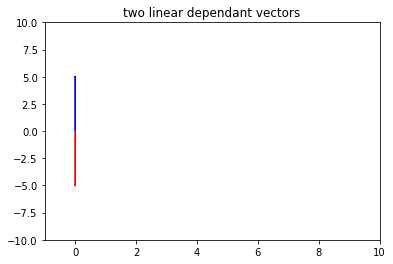

In [24]:
v5 = [0,5]
v6 = [0,-5]

# Plot the Scaled Vectors
plt.arrow(0,0, v5[0], v6[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v6[0], v5[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,10)          
plt.ylim(-10,10)
plt.title("two linear dependant vectors")
plt.show()

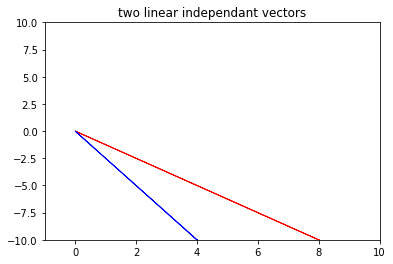

In [25]:
v7 = [8,10]
v8 = [4,-10]

# Plot the Scaled Vectors
plt.arrow(0,0, v7[0], v8[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v8[0], v8[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,10)          
plt.ylim(-10,10)
plt.title("two linear independant vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [31]:
g = np.array([1,2])
h = np.array([4,8])

rank_0 = np.linalg.matrix_rank([g,h])
print(f'Span is R{rank_0}')

# # Plot the Scaled Vectors
# plt.arrow(0,0, g[0], g[1],head_width=.80, head_length=0.80, color ='red')
# plt.arrow(0,0, h[0], h[1],head_width=.05, head_length=0.50, color ='blue')
# plt.xlim(-1,10)          
# plt.ylim(-1,10)
# plt.title("two linear independant vectors")
# plt.show()



Span is R1


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [27]:
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])

rank_1 = np.linalg.matrix_rank([l,m,n])
print(f'Span is R{rank_1}')

Span is R3


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



[1 1]
2


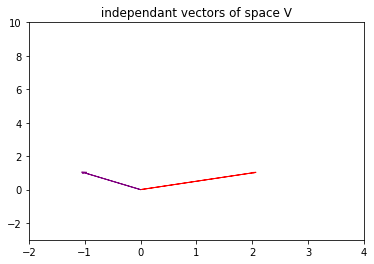

In [37]:
v9 = np.array([2,1])
v10 = np.array([-1,1])

V9 = v9.reshape(-1,1)
V10 = v10.reshape(-1,1)
rank_v9_v10 = np.linalg.matrix_rank([V9,V10])
print(rank_v9_v10)

import math
vA = [math.pi, -1.1**11]
vB = [-math.sqrt(7), math.e]

rank_ = np.linalg.matrix_rank([vA,vB])
print(rank_)

# Plot the Scaled Vectors
plt.arrow(0,0, V9[0, 0], V9[1,0],head_width=.05, head_length=0.08, color ='red')
plt.arrow(0,0, V10[0, 0], V10[1,0],head_width=.1, head_length=0.08, color ='purple')

plt.xlim(-2,4)          
plt.ylim(-3,10)
plt.title(f" independant vectors of space V ")
plt.show()

## 6.2 What does it mean to form a basis?

It means that the linear combinations of the vectors will fill the space of $\mathbb{R}^2$ 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [29]:
p = np.array([[1,2,3],[-1,0,7],[4,8,2]])
rank_p = np.linalg.matrix_rank(p)
print(rank_p)

3


## 7.2 What does the rank of a matrix tell us?

The matrix is spans a vector space of 3, and is irreducible

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

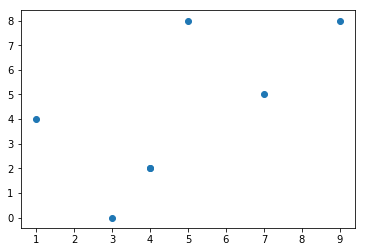

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()